# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('ggplot')
import pandas as pd
import seaborn as sns

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [2]:
# Import the dataset
data = pd.read_csv('weight-height.csv')

# Separate the data into male and female dataframes
male_df = data[data['Gender'] == 'Male']
female_df = data[data['Gender'] == 'Female']

# Calculate means and standard deviations
male_height_mean = male_df['Height'].mean()
male_height_sd = male_df['Height'].std()
male_weight_mean = male_df['Weight'].mean()
male_weight_sd = male_df['Weight'].std()

female_height_mean = female_df['Height'].mean()
female_height_sd = female_df['Height'].std()
female_weight_mean = female_df['Weight'].mean()
female_weight_sd = female_df['Weight'].std()

print("Male Height mean:", male_height_mean)
print("Male Height sd:", male_height_sd)
print("Male Weight mean:", male_weight_mean)
print("Male Weight sd:", male_weight_sd)
print("Female Height mean:", female_height_mean)
print("Female Height sd:", female_height_sd)
print("Female Weight mean:", female_weight_mean)
print("Female Weight sd:", female_weight_sd)


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
Male Height mean: 69.02634590621741
Male Height sd: 2.863362228660651
Male Weight mean: 187.0206206581932
Male Weight sd: 19.781154516763813
Female Height mean: 63.70877360342507
Female Height sd: 2.696284015765055
Female Weight mean: 135.86009300746835
Female Weight sd: 19.022467805319007


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

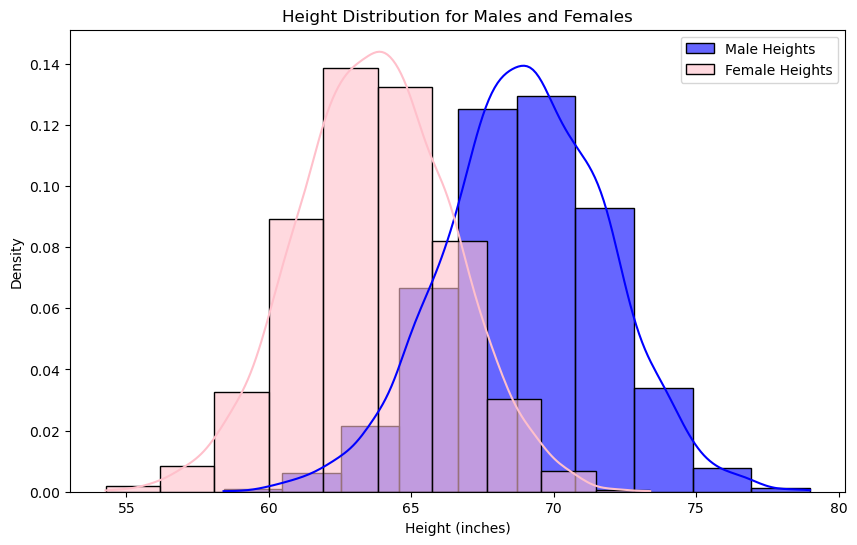

In [3]:
# Your code here
# Plot histograms with density for male and female heights
plt.figure(figsize=(10, 6))

# Male heights
sns.histplot(male_df['Height'], kde=True, bins=10, color='blue', alpha=0.6, label='Male Heights', stat='density')

# Female heights
sns.histplot(female_df['Height'], kde=True, bins=10, color='pink', alpha=0.6, label='Female Heights', stat='density')

plt.xlabel('Height (inches)')
plt.ylabel('Density')
plt.legend()
plt.title('Height Distribution for Males and Females')
plt.show()


In [ ]:
# Record your observations - are these inline with your personal observations?
# Men tend to have higher values of heights in general than women.
# The most common region for male and female heights is between 65-67 inches.
# Male heights have a slightly higher spread than female heights.
# Both male and female heights are normally distributed.

In [ ]:
# Record your observations - are these inline with your personal observations?

# Men tend to have higher values of heights in general than female
# The most common region for male and female heights is between 65 - 67 inches (about 5 and a half feet)
# Male heights have a slightly higher spread than female heights, hence the male height peak is slightly smaller than female height
# Both heights are normally distributed

## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

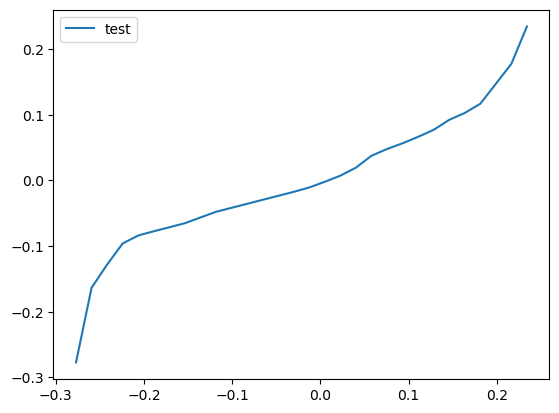

In [4]:
def density(x):
    counts, bin_edges = np.histogram(x, bins=30, density=True)
    cdf = np.cumsum(counts)
    cdf = cdf / cdf[-1]
    
    x_mid = (bin_edges[:-1] + bin_edges[1:]) / 2
    y_interp = np.interp(np.linspace(0, 1, len(cdf)), cdf, x_mid)
    return x_mid, y_interp

# Generate test data and test the function
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x, y = density(s)
plt.plot(x, y, label='test')
plt.legend()
plt.show()


## Add overlapping density plots to the histograms plotted earlier

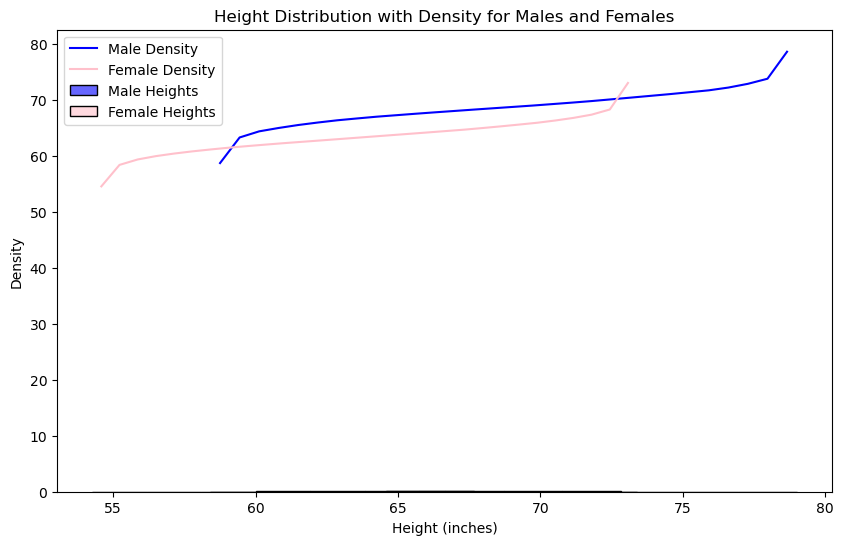

In [5]:
# Your code here 
# Plot histograms with density for male and female heights with density function
plt.figure(figsize=(10, 6))

# Male heights
sns.histplot(male_df['Height'], kde=False, bins=10, color='blue', alpha=0.6, label='Male Heights', stat='density')
x_male, y_male = density(male_df['Height'])
plt.plot(x_male, y_male, color='blue', label='Male Density')

# Female heights
sns.histplot(female_df['Height'], kde=False, bins=10, color='pink', alpha=0.6, label='Female Heights', stat='density')
x_female, y_female = density(female_df['Height'])
plt.plot(x_female, y_female, color='pink', label='Female Density')

plt.xlabel('Height (inches)')
plt.ylabel('Density')
plt.legend()
plt.title('Height Distribution with Density for Males and Females')
plt.show()


## Repeat the above exercise for male and female weights

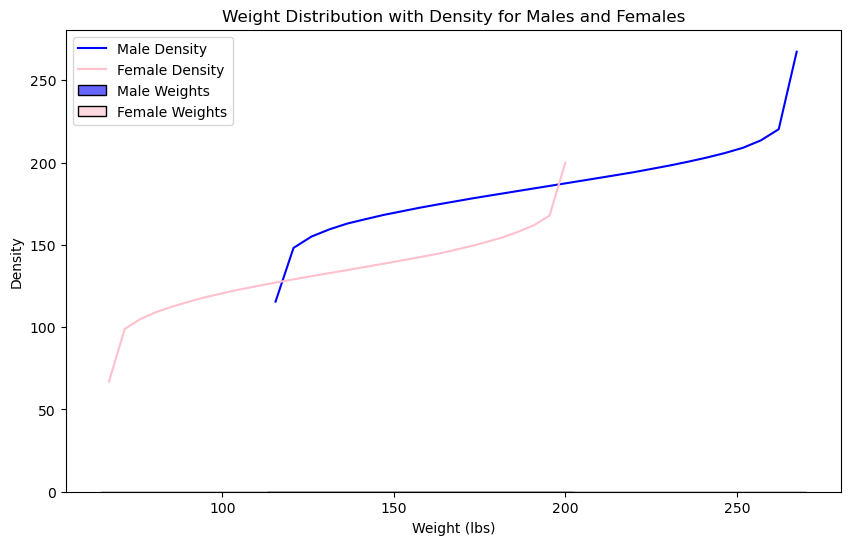

In [6]:
# Your code here 
# Plot histograms with density for male and female weights with density function
plt.figure(figsize=(10, 6))

# Male weights
sns.histplot(male_df['Weight'], kde=False, bins=10, color='blue', alpha=0.6, label='Male Weights', stat='density')
x_male_weight, y_male_weight = density(male_df['Weight'])
plt.plot(x_male_weight, y_male_weight, color='blue', label='Male Density')

# Female weights
sns.histplot(female_df['Weight'], kde=False, bins=10, color='pink', alpha=0.6, label='Female Weights', stat='density')
x_female_weight, y_female_weight = density(female_df['Weight'])
plt.plot(x_female_weight, y_female_weight, color='pink', label='Female Density')

plt.xlabel('Weight (lbs)')
plt.ylabel('Density')
plt.legend()
plt.title('Weight Distribution with Density for Males and Females')
plt.show()


## Write your observations in the cell below

In [ ]:
# Record your observations - are these inline with your personal observations?


# What is the takeaway when comparing male and female heights and weights?

In [ ]:
# Record your observations - are these inline with your personal observations?

# The patterns and overlap are highly similar to what we see with height distributions
# Men generally are heavier than women
# The common region for common weights is around 160 lbs. 
# Male weight has slightly higher spread than female weight (i.e. more variation)
# Most females are around 130-140 lbs whereas most men are around 180 pounds.

#Takeaway

# Weight is more suitable to distinguish between males and females than height

## Repeat the above experiments in seaborn and compare with your results

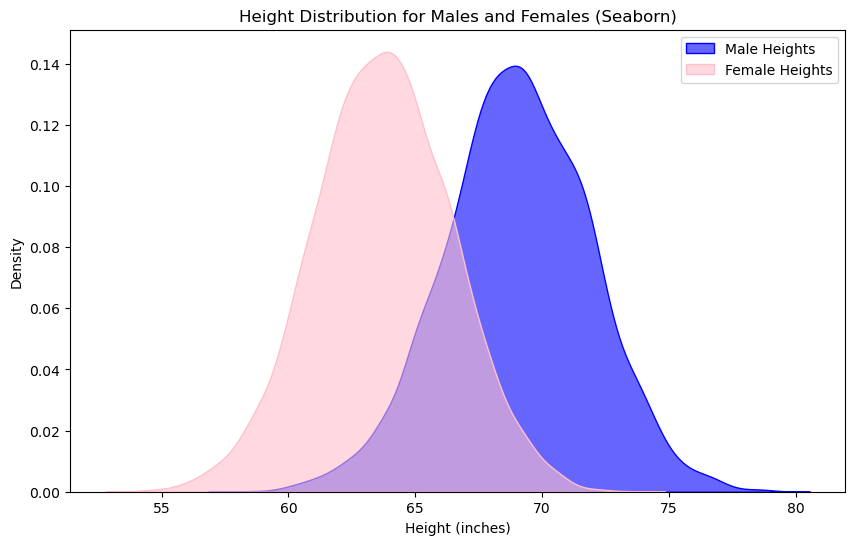

In [7]:
# Code for heights here
plt.figure(figsize=(10, 6))

# Male heights
sns.kdeplot(male_df['Height'], color='blue', label='Male Heights', fill=True, alpha=0.6)

# Female heights
sns.kdeplot(female_df['Height'], color='pink', label='Female Heights', fill=True, alpha=0.6)

plt.xlabel('Height (inches)')
plt.ylabel('Density')
plt.legend()
plt.title('Height Distribution for Males and Females (Seaborn)')
plt.show()


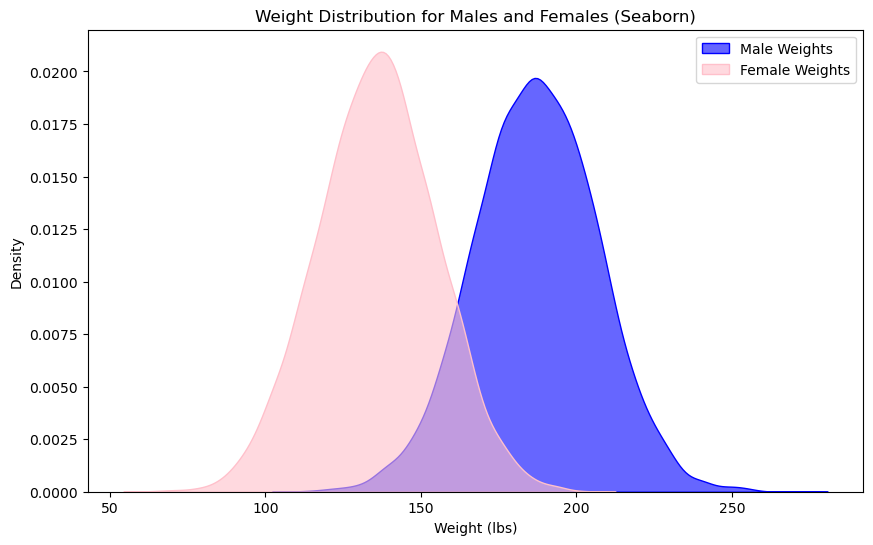

In [8]:
# Code for weights here
plt.figure(figsize=(10, 6))

# Male weights
sns.kdeplot(male_df['Weight'], color='blue', label='Male Weights', fill=True, alpha=0.6)

# Female weights
sns.kdeplot(female_df['Weight'], color='pink', label='Female Weights', fill=True, alpha=0.6)

plt.xlabel('Weight (lbs)')
plt.ylabel('Density')
plt.legend()
plt.title('Weight Distribution for Males and Females (Seaborn)')
plt.show()


In [ ]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?

In [ ]:
# Well, what do you think? Overlapping or side to side (or rather top/bottom)

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.